In [1]:
import physt
from physt import h1, h2, histogramdd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import astropy.units as u 
import scipy.stats as st
import scipy.special as sp
import pandas as pd
from matplotlib import colors

# %matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# %config InlineBackend.figure_format = 'svg'

In [4]:
x_in = []
# x-position of each particle.
y_in = []
# y-position of each particle.
p_I  = []
# particle current in [Amperes].
p_KP = []
# particle power in [Watts].

In [5]:
file_name = 'quick_input.out'

In [6]:
with open(file_name) as file:
    data = pd.read_csv(file,delimiter='\t',header=2,skipfooter=1,engine='python')
    
    columns = data.columns.values
    listCol = list(columns)
    print(listCol)
    # Obtain and print the column headers.
    
    x_in = data['x[in]']
    y_in = data['y[in]']
    p_I  = data['pI[A]']
    p_KP = data['pKP[W]']
    # Take column headers and save separate lists for needed values.

['pID', 'eTag', 'x[in]', 'y[in]', 'z[in]', 'vx/c', 'vy/c', 'vz/c', 'pI[A]', 'pKP[W]']


In [7]:
def resolution_factor(size, magnitude): # Function which yields a dl size, depending on # particles and custom factor.
    dl = (1/size)*magnitude + 1
    dl *= 0.000078                      # [Inches], two microns * dl constant.
    return dl

In [8]:
dl = resolution_factor(len(x_in), 5e3)  # Calculate dl for # particles and custom factor.

Wall time: 50 ms


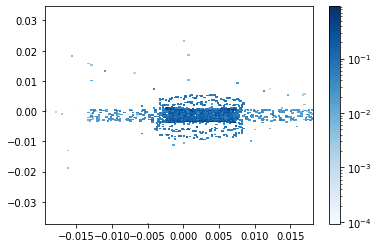

In [9]:
%%time
h, x_edge, y_edge, image = plt.hist2d(x_in,y_in,bins=[np.arange(np.amin(x_in),np.amax(x_in),dl),
                               np.arange(np.amin(y_in),np.amax(y_in),dl)],
                               weights=p_KP,cmap='Blues',
                               norm=colors.LogNorm())
density = plt.colorbar()

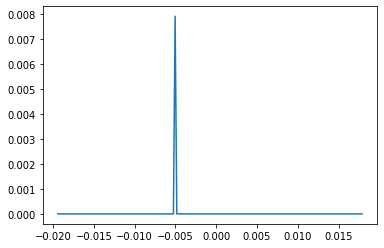

In [10]:
%matplotlib inline
plt.plot(x_edge[:-1],h.T[0])
plt.show() #???? this is meaningless hah.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

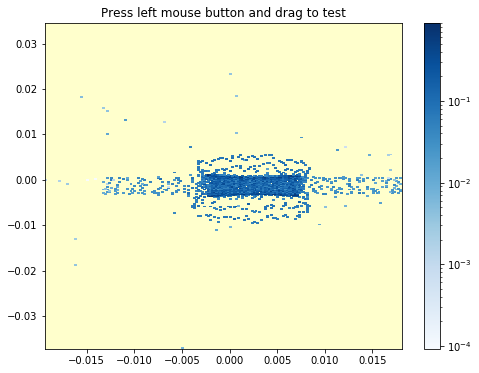

In [11]:
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib widget



fig, (ax1) = plt.subplots(1, figsize=(8, 6))
# ax1.set(facecolor='#FFFFCC')

x = np.arange(np.amin(x_in),np.amax(x_in),dl)
y = np.arange(np.amin(y_in),np.amax(y_in),dl)


ax1.set_title('Press left mouse button and drag to test')
ax1.set(facecolor='#FFFFCC')


line1 = plt.hist2d(x_in,y_in,bins=[np.arange(np.amin(x_in),np.amax(x_in),dl),
                               np.arange(np.amin(y_in),np.amax(y_in),dl)],
                               weights=p_KP,cmap='Blues',norm=colors.LogNorm())


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line1.set_data(thisx, thisy)
    ax1.set_xlim(thisx[0], thisx[-1])
    ax1.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

    
    
    
    
density = plt.colorbar()    
plt.show()

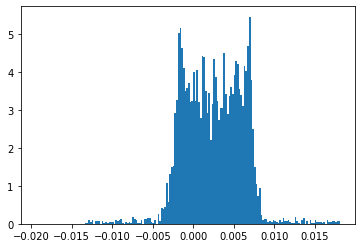

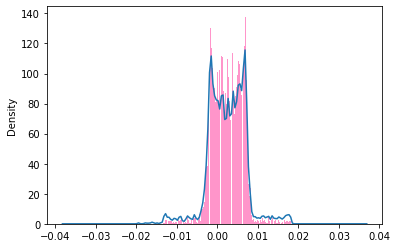

In [12]:
%matplotlib inline

plt.hist(
    x_in,
    weights=p_KP,
    bins=x_edge)
plt.show()

s = pd.Series(x_in)
s.plot.kde(bw_method=0.05, ind=len(x_edge))
n_i, bins, patches = plt.hist(x=x_in, bins=x_edge, color='hotpink',
                            alpha=0.7, rwidth=.95, density=True,weights=p_KP)

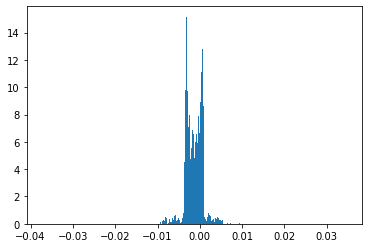

In [13]:
plt.hist(
    y_in,
    weights=p_KP,
    bins=y_edge)
plt.show()

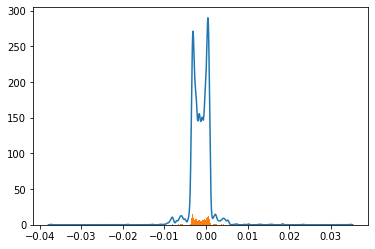

In [14]:
from statsmodels.nonparametric.kde import KDEUnivariate

kde1 = KDEUnivariate(y_in)
kde1.fit(bw=dl)

plt.plot(kde1.support, [kde1.evaluate(xi) for xi in kde1.support]) # Not weighted.
plt.hist(
    y_in,
    weights=p_KP,
    bins=y_edge)
plt.show()

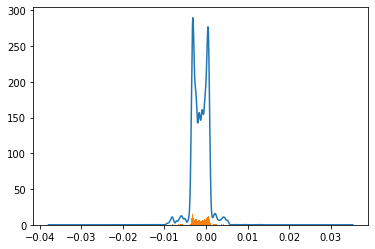

In [15]:
# TRYING TO WEIGHT!!!

kde1 = KDEUnivariate(y_in)
kde1.fit(weights=np.array(p_KP),
         bw=dl,
         fft=False)
plt.plot(kde1.support, [kde1.evaluate(xi) for xi in kde1.support], '-')
plt.hist(
    y_in,
    weights=p_KP,
    bins=y_edge)
plt.show()


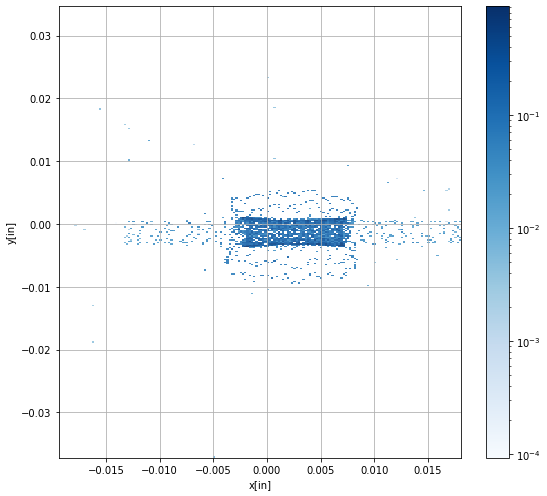

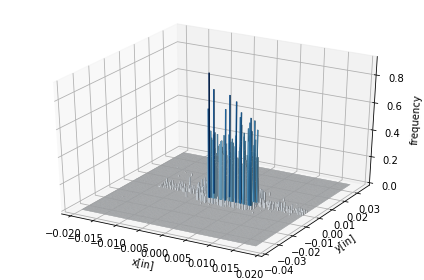

In [16]:
fig, ax = plt.subplots(figsize=(8, 7))
h_2 = h2(x_in, y_in, bins=[np.arange(np.amin(x_in),np.amax(x_in),dl),
                               np.arange(np.amin(y_in),np.amax(y_in),dl)], weights=p_KP)
h_2.plot("map", lw=0, alpha=0.9, cmap="Blues", ax=ax, cmap_normalize="log", show_zero=False)

plt.grid()
h_2.plot("bar3d", cmap="Blues");

In [17]:
p_KP/dl

0       291.809741
1       204.752295
2       235.074969
3       246.745286
4       184.756592
           ...    
2985    205.252691
2986    265.185586
2987    222.249854
2988    360.113600
2989    371.321902
Name: pKP[W], Length: 2990, dtype: float64

# Let's mess with 3D visualization!

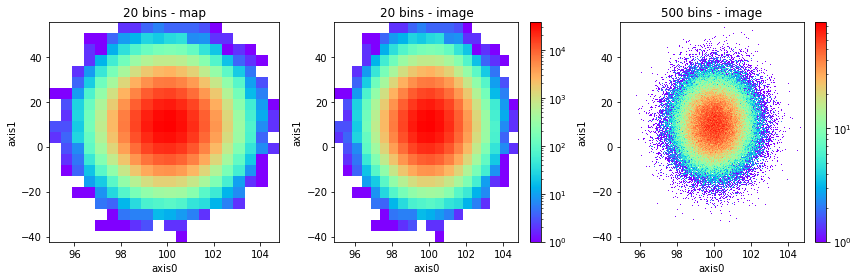

In [18]:
x = np.random.normal(100, 1, 1000000)
y = np.random.normal(10, 10, 1000000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(x, y, 20, name="20 bins - map").plot("map", alpha=1, lw=0, show_zero=False, cmap="rainbow", ax=axes[0], show_colorbar=False, cmap_normalize="log")
h2(x, y, 20, name="20 bins - image").plot("image", alpha=1, ax=axes[1], cmap="rainbow", cmap_normalize="log")
h2(x, y, 500, name="500 bins - image").plot("image", alpha=1, ax=axes[2], cmap="rainbow", cmap_normalize="log");

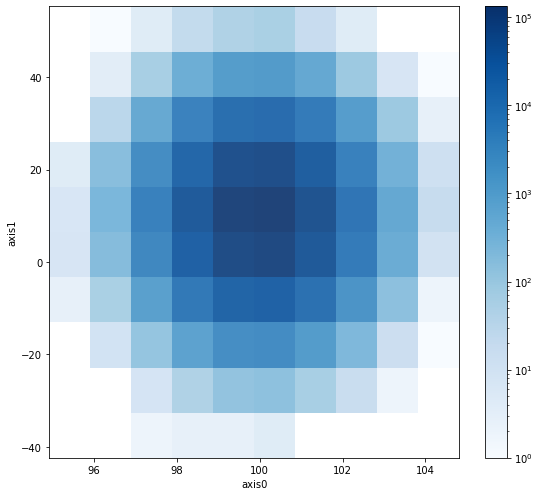

In [19]:
# Composition - show histogram overlayed with "points"
fig, ax = plt.subplots(figsize=(8, 7))
h_2 = h2(x, y, 10)
h_2.plot("map", lw=0, alpha=0.9, cmap="Blues", ax=ax, cmap_normalize="log", show_zero=False)

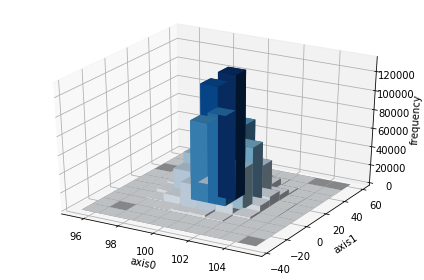

In [20]:
h_2.plot("bar3d", cmap="Blues");